In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import re
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from imblearn.metrics.pairwise import ValueDifferenceMetric

In [2]:
def load_dataset(path):
    return pd.read_csv(path, sep=' ', header=None)

def remove_backspace(string):
    result = ''
    for char in string:
        if char == '\b':
            result = result[:-1]
        else:
            result += char
    return result

def load_json(path='iris_result.json'):
    with open(path, 'r') as f:
        string = f.read()
        string = remove_backspace(string)
        string = string.replace('-nan', 'null')
        string = string.replace('nan', 'null')
        data = json.loads(string)
    return data

In [3]:
def plot_pca(X, c, title, first=True):
    _, vec = np.linalg.eigh(X.T @ X )
    Z = X @ vec
    plt.scatter(Z[:, -1], Z[:, -2], c=c)
    if first:
        plt.scatter(Z[:1, -1], Z[:1, -2], c='red')
    plt.title(title)
    plt.xlabel('PC0')
    plt.ylabel('PC1')
    plt.gca().set_aspect('equal')

In [4]:
def plot_distance(arr, c, title, first=True):
    _, Z = np.linalg.eigh(arr)
    # Z = arr @ vec
    plt.scatter(Z[:, -1], Z[:, -2], c=c)
    if first:
        plt.scatter(Z[:1, -1], Z[:1, -2], c='r')
    plt.title(title)
    plt.xlabel('PC0')
    plt.ylabel('PC1')

In [5]:
def plot_sim(arr, c, title, first=True):
    _, Z = np.linalg.eigh(arr)
    plt.scatter(Z[:, -1], Z[:, -2], c=c)
    if first:
        plt.scatter(Z[:1, -1], Z[:1, -2], c='r')
    plt.title(title)
    plt.xlabel('PC0')
    plt.ylabel('PC1')

In [6]:
def print_table(results):
    print("\\toprule")
    print(" measure & k-NN & k+NN & RIA & RIONA \\\\")
    print("\\midrule")
    print("accuracy ", end='')
    for k, v in results['measures']['accuracy'].items():
        print(f"& {v: .3f} ", end="")
    print("\\\\")
    print("balanced accuracy ", end='')
    for k, v in results['measures']['balanced_accuracy'].items():
        print(f"& {v: .3f} ", end="")
    print("\\\\")
    print("\\bottomrule")

In [7]:
i = 0

# Iris

In [8]:
results = load_json()

In [9]:
df = load_dataset('data/csv/iris.csv')

In [10]:
y = df[0].to_numpy()
X = df[[1,2,3,4]].to_numpy()

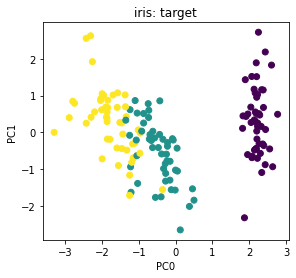

In [11]:
plot_pca(X, results['predictions']['target'], 'iris: target', False)
plt.savefig(f'images/image_{i}.png'); i += 1

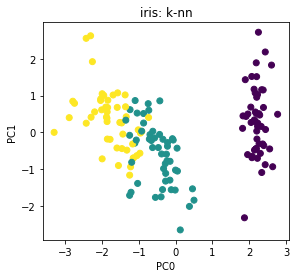

In [12]:
plot_pca(X, results['predictions']['kmnn'], 'iris: k-nn', False)
plt.savefig(f'images/image_{i}.png'); i += 1

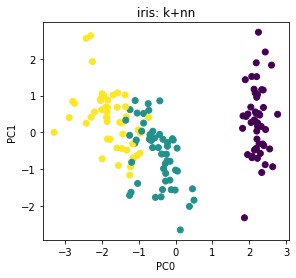

In [13]:
plot_pca(X, results['predictions']['kpnn'], 'iris: k+nn', False)
plt.savefig(f'images/image_{i}.png'); i += 1

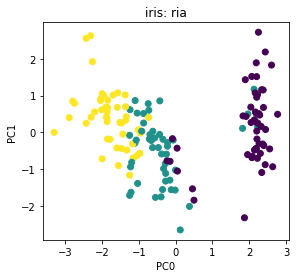

In [14]:
plot_pca(X, results['predictions']['ria'], 'iris: ria', False)
plt.savefig(f'images/image_{i}.png'); i += 1

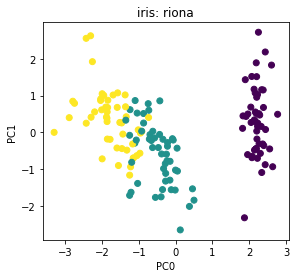

In [15]:
plot_pca(X, results['predictions']['riona'], 'iris: riona', False)
plt.savefig(f'images/image_{i}.png'); i += 1

In [16]:
print_table(results)

\toprule
 measure & k-NN & k+NN & RIA & RIONA \\
\midrule
accuracy &  0.953 &  0.953 &  0.880 &  0.953 \\
balanced accuracy &  0.953 &  0.953 &  0.880 &  0.953 \\
\bottomrule


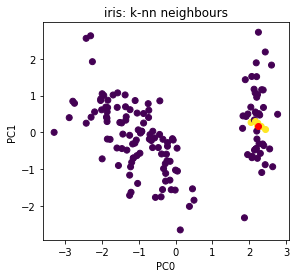

In [17]:
plot_pca(X, [True] + [d['decisive'] for d in results['metadata'][0]['kmnn']['metadata']], 'iris: k-nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

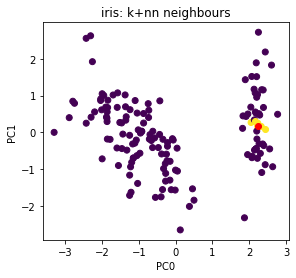

In [18]:
plot_pca(X, [True] + [d['decisive'] for d in results['metadata'][0]['kpnn']['metadata']], 'iris: k+nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

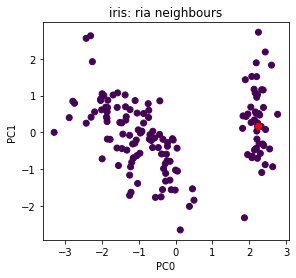

In [19]:
plot_pca(X, [True] + [d['decisive'] for d in results['metadata'][0]['ria']['metadata']], 'iris: ria neighbours') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

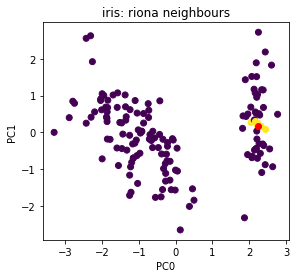

In [20]:
plot_pca(X, [True] + [d['decisive'] for d in sorted(results['metadata'][0]['riona']['metadata'], key=lambda x: x['ngbr_id'])], 'iris: riona neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

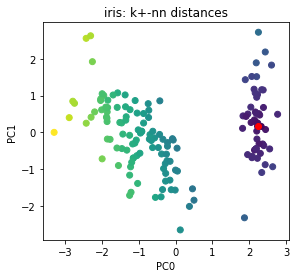

In [21]:
plot_pca(X, [0] + [d['distance'] for d in results['metadata'][0]['kpnn']['metadata']], 'iris: k+-nn distances')
plt.savefig(f'images/image_{i}.png'); i += 1

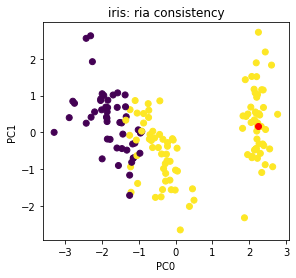

In [22]:
plot_pca(X, [True] + [d['consistent'] for d in results['metadata'][0]['ria']['metadata']], 'iris: ria consistency') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

# Tae

In [23]:
results = load_json('tae_result.json')

In [24]:
df = load_dataset('data/csv/tae.csv')

In [25]:
y = df[0].to_numpy()
X = df[[1,2,3,4,5]].to_numpy()

In [26]:
D = (
    2 * np.exp(-ValueDifferenceMetric().fit(X[:, 0:1], y).pairwise(X[:, 0:1])) - 1 + 
    2 * np.exp(-ValueDifferenceMetric().fit(X[:, 3:4], y).pairwise(X[:, 3:4])) - 1 +
    X[:, [1,2,4]] @ X[:, [1,2,4]].T
) 

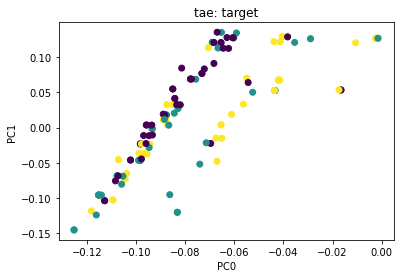

In [27]:
plot_sim(D, results['predictions']['target'], 'tae: target', False)
plt.savefig(f'images/image_{i}.png'); i += 1

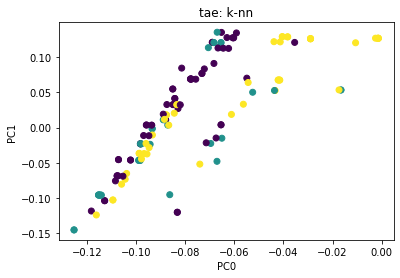

In [28]:
plot_sim(D, results['predictions']['kmnn'], 'tae: k-nn', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

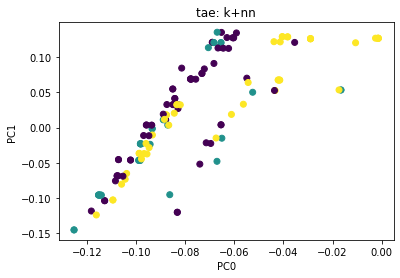

In [29]:
plot_sim(D, results['predictions']['kpnn'], 'tae: k+nn', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

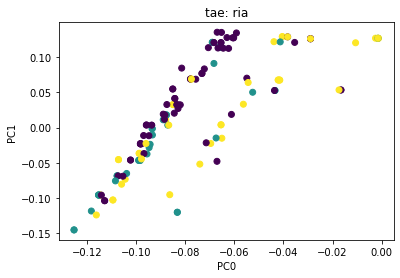

In [30]:
plot_sim(D, results['predictions']['ria'], 'tae: ria', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

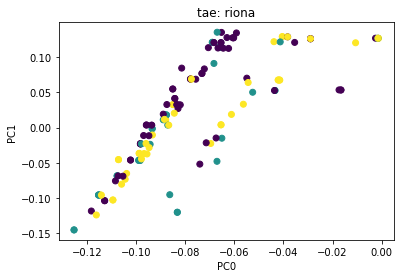

In [31]:
plot_sim(D, results['predictions']['riona'], 'tae: riona', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

In [32]:
print_table(results)

\toprule
 measure & k-NN & k+NN & RIA & RIONA \\
\midrule
accuracy &  0.517 &  0.523 &  0.656 &  0.656 \\
balanced accuracy &  0.517 &  0.523 &  0.657 &  0.657 \\
\bottomrule


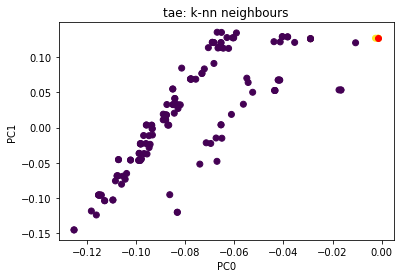

In [33]:
plot_sim(D, [True] + [d['decisive'] for d in results['metadata'][0]['kmnn']['metadata']], 'tae: k-nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

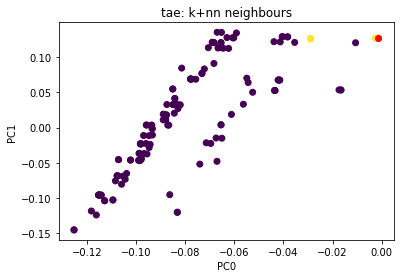

In [34]:
plot_sim(D, [0] + [d['decisive'] for d in results['metadata'][0]['kpnn']['metadata']], 'tae: k+nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

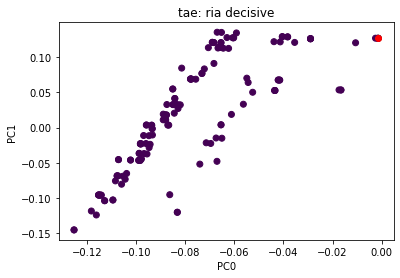

In [35]:
plot_sim(D, [3] + [d['decisive'] for d in results['metadata'][0]['ria']['metadata']], 'tae: ria decisive') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

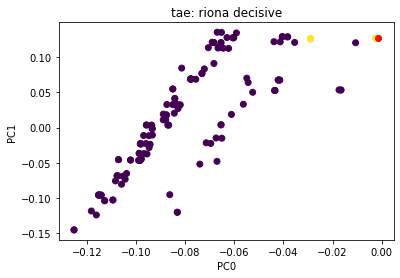

In [36]:
plot_sim(D, [True] + [d['decisive'] for d in sorted(results['metadata'][0]['riona']['metadata'], key=lambda x: x['ngbr_id'])], 'tae: riona decisive')
plt.savefig(f'images/image_{i}.png'); i += 1

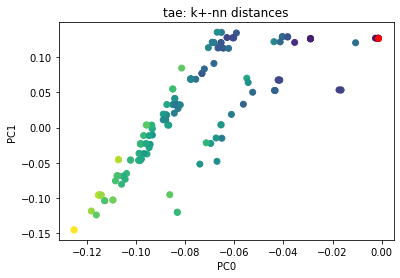

In [37]:
plot_sim(D, [0] + [d['distance'] for d in results['metadata'][0]['kpnn']['metadata']], 'tae: k+-nn distances')
plt.savefig(f'images/image_{i}.png'); i += 1

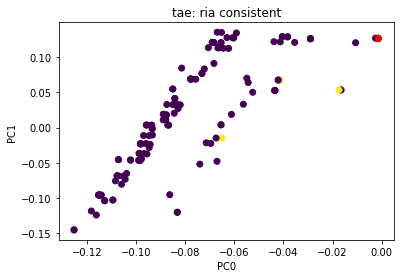

In [38]:
plot_sim(D, [True] + [d['consistent'] for d in results['metadata'][0]['ria']['metadata']], 'tae: ria consistent') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

# Zoo

In [39]:
results = load_json('zoo_result.json')

In [40]:
df = load_dataset('data/csv/zoo.csv')

In [41]:
y = df[0].to_numpy()
X = df.iloc[:, 1:].to_numpy()

In [42]:
D = 0
for j in range(16):
    D += 2 * np.exp(-ValueDifferenceMetric().fit(X[:, j:j+1], y).pairwise(X[:, j:j+1])) - 1

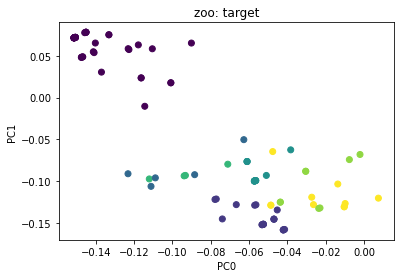

In [43]:
plot_sim(D, results['predictions']['target'], 'zoo: target', False)
plt.savefig(f'images/image_{i}.png'); i += 1

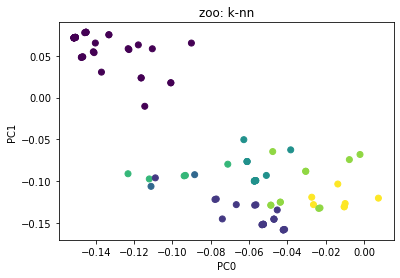

In [44]:
plot_sim(D, results['predictions']['kmnn'], 'zoo: k-nn', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

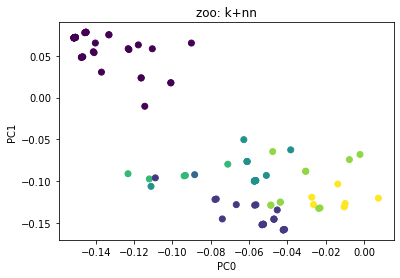

In [45]:
plot_sim(D, results['predictions']['kpnn'], 'zoo: k+nn', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

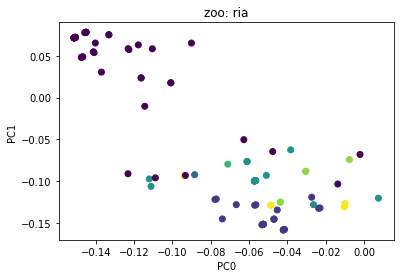

In [46]:
plot_sim(D, results['predictions']['ria'], 'zoo: ria', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

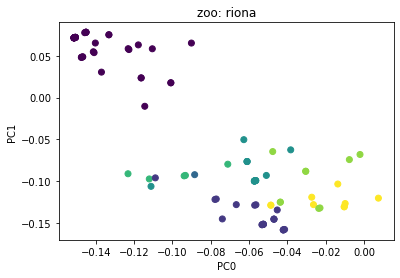

In [47]:
plot_sim(D, results['predictions']['riona'], 'zoo: riona', False) 
plt.savefig(f'images/image_{i}.png'); i += 1

In [48]:
print_table(results)

\toprule
 measure & k-NN & k+NN & RIA & RIONA \\
\midrule
accuracy &  0.941 &  0.931 &  0.851 &  0.950 \\
balanced accuracy &  0.871 &  0.843 &  0.654 &  0.871 \\
\bottomrule


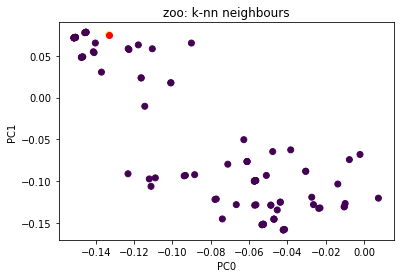

In [49]:
plot_sim(D, [True] + [d['decisive'] for d in results['metadata'][0]['kmnn']['metadata']], 'zoo: k-nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

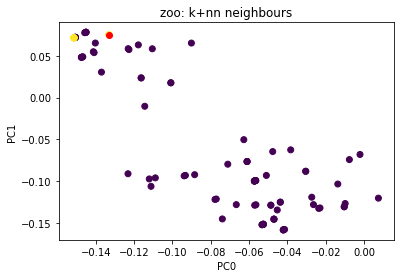

In [50]:
plot_sim(D, [True] + [d['decisive'] for d in results['metadata'][0]['kpnn']['metadata']], 'zoo: k+nn neighbours')
plt.savefig(f'images/image_{i}.png'); i += 1

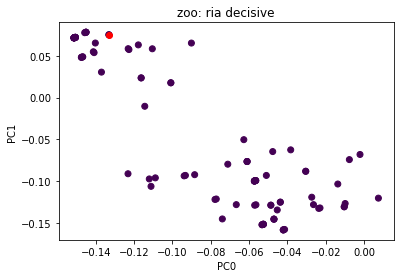

In [51]:
plot_sim(D, [True] + [d['decisive'] for d in results['metadata'][0]['ria']['metadata']], 'zoo: ria decisive') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

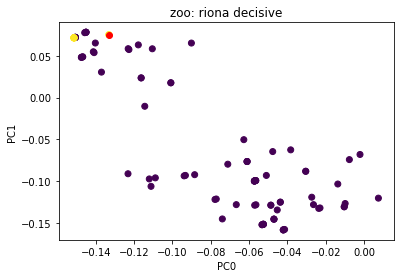

In [52]:
plot_sim(D, [True] + [d['decisive'] for d in sorted(results['metadata'][0]['riona']['metadata'], key=lambda x: x['ngbr_id'])], 'zoo: riona decisive')
plt.savefig(f'images/image_{i}.png'); i += 1

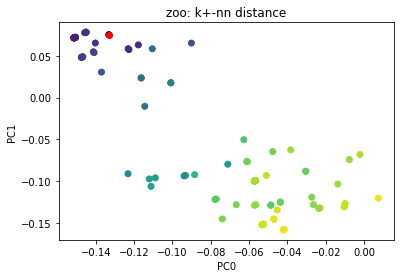

In [53]:
plot_sim(D, [0] + [d['distance'] for d in results['metadata'][0]['kpnn']['metadata']], 'zoo: k+-nn distance')
plt.savefig(f'images/image_{i}.png'); i += 1

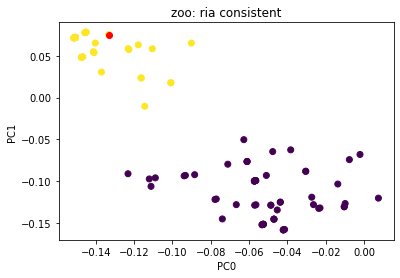

In [54]:
plot_sim(D, [True] + [d['consistent'] for d in results['metadata'][0]['ria']['metadata']], 'zoo: ria consistent') # All True
plt.savefig(f'images/image_{i}.png'); i += 1

# Example

In [55]:
results = load_json('example_result.json')
df = load_dataset('data/csv/example.csv')

In [56]:
keys = ['ngbr_id', 'decision', 'consistent']
print('\\toprule')
for k in keys:
    print(k, end=' & ' if k != keys[-1] else ' \\\\\n')
print('\\midrule')
for row in results['metadata'][-1]['ria']['metadata']:
    for k in keys:
        print(row[k], end=' & ' if k != keys[-1] else ' \\\\\n')
print('\\bottomrule')

\toprule
ngbr_id & decision & consistent \\
\midrule
0 & 1 & True \\
1 & 1 & False \\
2 & 0 & True \\
3 & 0 & True \\
4 & 1 & True \\
5 & 0 & True \\
6 & 0 & True \\
\bottomrule


In [57]:
keys = ['ngbr_id', 'decision', 'distance']
print('\\toprule')
for k in keys:
    print(k, end=' & ' if k != keys[-1] else ' \\\\\n')
print('\\midrule')
for row in results['metadata'][-1]['kmnn']['metadata']:
    for k in keys:
        print(row[k], end=' & ' if k != keys[-1] else ' \\\\\n')
print('\\bottomrule')

\toprule
ngbr_id & decision & distance \\
\midrule
0 & 1 & 5.54422 \\
1 & 1 & 4.32934 \\
2 & 0 & 2.90135 \\
3 & 0 & 3.6292 \\
4 & 1 & 2.427989 \\
5 & 0 & 4.303772 \\
6 & 0 & 3.287961 \\
\bottomrule


# Datasets Info

In [58]:
import json

In [59]:
with open('data/stats/example.json') as file:
    example_stats = json.load(file)

In [60]:
example_stats

{'file_name': 'example.csv',
 'number_of_observations': 8,
 'number_of_attributes': 4,
 'decision_attribute_position': 1,
 'attributes': {'0': {'type': 'categorical',
   'stats': {'counts': {'1': 4, '0': 4}, 'table': None}},
  '1': {'type': 'numerical',
   'stats': {'min': -1.3858697343671664, 'max': 1.6378460497066514}},
  '2': {'type': 'numerical',
   'stats': {'min': -1.0502100630210074, 'max': 2.450490147049017}},
  '3': {'type': 'categorical',
   'stats': {'counts': {'1': 4, '0': 4}, 'table': {'0': [2, 2], '1': [2, 2]}}},
  '4': {'type': 'categorical',
   'stats': {'counts': {'3': 3, '1': 2, '2': 2, '0': 1},
    'table': {'0': [1, 0], '1': [0, 2], '2': [1, 1], '3': [2, 1]}}}}}

In [61]:
stats = example_stats
print('\\begin{myEnumerate}')
for k, v in stats.items():
    if k != 'attributes':
        print("\\item", k, ":", v)
    else:
        print("\\item", k, ":")
        print("\\begin{myEnumerate}")
        for kk, vv in sorted(v.items()):
            print("\\item", kk, ":")
            print("\\begin{myEnumerate}")
            print("\\item type:", vv['type'])
            print("\\item stats:")
            print("\\begin{myEnumerate}")
            if vv['type'] == 'numerical':
                for kkk, vvv in vv['stats'].items():
                    print("\\item", kkk, ":", vvv)
            else:
                print("\\item counts:")
                print("\\begin{myEnumerate}")
                for kkk, vvv in vv['stats']['counts'].items():
                    print("\\item ", kkk, ":", vvv)
                print("\\end{myEnumerate}")
                
                if vv['stats']['table'] is not None:
                    print("\\item table:")
                    print("\\begin{myEnumerate}")
                    for kkk, vvv in vv['stats']['table'].items():
                        print("\\item ", kkk, ":", vvv)
                    print("\\end{myEnumerate}")
                
            print("\\end{myEnumerate}")
            print("\\end{myEnumerate}")
        print("\\end{myEnumerate}")
print("\\end{myEnumerate}")

\begin{myEnumerate}
\item file_name : example.csv
\item number_of_observations : 8
\item number_of_attributes : 4
\item decision_attribute_position : 1
\item attributes :
\begin{myEnumerate}
\item 0 :
\begin{myEnumerate}
\item type: categorical
\item stats:
\begin{myEnumerate}
\item counts:
\begin{myEnumerate}
\item  1 : 4
\item  0 : 4
\end{myEnumerate}
\end{myEnumerate}
\end{myEnumerate}
\item 1 :
\begin{myEnumerate}
\item type: numerical
\item stats:
\begin{myEnumerate}
\item min : -1.3858697343671664
\item max : 1.6378460497066514
\end{myEnumerate}
\end{myEnumerate}
\item 2 :
\begin{myEnumerate}
\item type: numerical
\item stats:
\begin{myEnumerate}
\item min : -1.0502100630210074
\item max : 2.450490147049017
\end{myEnumerate}
\end{myEnumerate}
\item 3 :
\begin{myEnumerate}
\item type: categorical
\item stats:
\begin{myEnumerate}
\item counts:
\begin{myEnumerate}
\item  1 : 4
\item  0 : 4
\end{myEnumerate}
\item table:
\begin{myEnumerate}
\item  0 : [2, 2]
\item  1 : [2, 2]
\end{my